# Projective Geometry

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Geometry
What is Geometry?

Well Geometry deals with the properties of figures in the plane or in space. \\There are lots of classification methods to break geometry into different parts. 

One useful distinction is between _Synthetic_ geometry and _Analytic_ geometry.
       

## Synthetic Geometry


Synthetic is what most of us think of as Geometry. i.e. drawing lines, and shapes and looking at points of intersection or angles etc. 

Indeed if you look at Euclid's Elements, all proofs are carried out using straight lines that we don't know a specific length of, or circles that we don't know the specific radius, but nonetheless, every figure can be built from the picture alone.

This idea of building up from simple parts using logic and reasoning is what is meant by synthesis, hence Synthetic Geometry.
![](images/Proof_of_Butterfly_theorem.png)
	
	
 

       


## Analytical Geometry
Analytical Geometry is based on the introduction of numerical coordinates and uses the techniques of algebra.
By doing this, Geometry, Analysis and Algebra were all brought together into one system.

To begin with, we normally always refer the algebra back to some picture or figure as if to prove that it is not just some sort of mathematical magic. 

But by using algebra we can free ourselves of the drawings (which, try as we might, can never really be exact) and move purely to abstract algebra to find solutions. 

In much the same way that imaginary numbers allowed us to find solutions to problems that could not appear on a graph, Analytic Geometry allows us to use all the systems of Algebra to produce a final result that, should we need to, we can always show pictorially.

The trouble for the student is that you can _see_ synthetic geometry but you can't see or interpret each of the steps in algebra. 

**If you can get over this, it will really pay you dividends.**
       

Theorems of elementary geometry are based on lengths (magnitudes), measures of angles, and areas/volumes. 

As we said in earlier lectures, there are geometrical transformations that can take place on figures that, while changing the figure, will retain some properties that are common to both the original and transformed figure.

Describing the properties that are retained in an algebraic fashion becomes useful for determining how a figure will change due to a transformation.
       

## Congruence

If two figures are congruent then they contain the same magnitudes and angles but not position. 
This means that the figure has undergone a rigid motion, (rotation, translation). 

Previously, we came up with algebraic formulations for these rigid body motions (translation, rotation) and we showed that they retained magnitudes (scalar product) and angles (cross product).
  

## Projective Transformation

In our list of geometrical tranformations, the one that preserved the least was the projective transform. 
There we stated only that it preserved straight lines. 

This may sound very limiting but ensuring that the straight lines in a figure are preserved under a transformation allows an enormous amount to be determined. 

And this is very important in Computer Vision because figures in the real world undergo a projective transform when being captured by a camera. 

So this class of transforms and the preservation of straight lines becomes a primary focus.

The study of projective geometry was considered long before the introduction of the camera. 

Artists such as da Vinci took it into account in order to draw realistic images, i.e. the real world is projected onto the canvas by the artist. 

The eye of the painter is the center of the projection. 

So it is drawn from the _perspective_ of the painter. 

Therefore the resulting image can be considered a _perspective_.

Lengths and angles are distorted, but in a way that is dependent on their relative positions.

As the human eye is used to seeing the world from a perspective view then the geometrical structure in an image can usually be recognised.
       

In [75]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec

camera_coords = np.array(np.zeros([8,2,2]))
epipole_coords = np.array(np.zeros([2,2]))
lambda1 = 0
lambda2 = 0
x1 = 0
x2 = 0
num_points = 4



def update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line = True):
    
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    #axs = [fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)]
    axs = [fig.add_subplot(gs[0,3]),fig.add_subplot(gs[1,3])]
    # Clear existing plots
    axs[0].cla()
    axs[1].cla()
    
    # Update and configure the first plot (Camera 1 View)
    axs[0].set_title('Plane 1')
    axs[0].set_xlim(-1, 1)
    axs[0].set_ylim(-0.5, 0.5)
    rect1 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(0, 1, 1, 0.2))  # Cyan color
    axs[0].add_patch(rect1)
    for i in range(0,num_points):
        axs[0].scatter(camera_coords[i][0][0], camera_coords[i][0][1], color='magenta')
        axs[0].text(camera_coords[i][0][0], camera_coords[i][0][1], f"x{i}", color='black')
        
    if vis_line:
        axs[0].plot([camera_coords[0][0][0], camera_coords[2][0][0]], [camera_coords[0][0][1], camera_coords[2][0][1]], color='magenta')

        

        # Update and configure the second plot (Camera 2 View)
    axs[1].set_title('Plane 2')
    axs[1].set_xlim(-1, 1)
    axs[1].set_ylim(-0.5, 0.5)
    rect2 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(1, 1, 0, 0.2))  # Yellow color
    axs[1].add_patch(rect2)
    for i in range(0,num_points):
        axs[1].scatter(camera_coords[i][1][0], camera_coords[i][1][1], color='green')
        axs[1].text(camera_coords[i][1][0], camera_coords[i][1][1], f"x{i}\'", color='black')
    if vis_line:
        axs[1].plot([camera_coords[0][1][0], camera_coords[2][1][0]], [camera_coords[0][1][1], camera_coords[2][1][1]], color='green')
   
        # Redraw the plots
    plt.draw()


# Define a function to update the plot with both elevation and azimuth angles
def update_plot(elev_angle, azim_angle, roll_angle, FL2, Alpha, Beta, Gamma, tx=0, ty=0, tz=0, vis_line=True):
    # Create a new matplotlib figure and axis
    fig = plt.figure(figsize=(20, 6))
    gs = GridSpec(2, 4, figure=fig)
    #fig = plt.figure(figsize=(30, 10))
    #ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(gs[0:4,:], projection='3d')
    # Set axes labels and limits
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 4])
    global E_mat
    global rot


    # Second camera array
    K=np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
    
    T = np.array([[1,0,0,tx],
                   [0,1,0,ty],
                   [0,0,1,tz],
                   [0,0,0,1]])
    
    # Individual Euler angle matrices
    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot = alphaRot @ betaRot @ gammaRot
    
    # Camera two focal length only.
    K_FL = ([[FL2,0,0,0],
       [0,FL2,0,0],
       [0,0,FL2,0],
       [0,0,0,1]])
    
    '''Special matrix for the applying the focal length to the z-axis only 
    This is used to move the image sensor with the focal length but not resize the sensor
    '''
    K_plane = ([[1,0,0,0],
               [0,1,0,0],
               [0,0 ,FL2,0],
               [0,0 ,0,1]])
    
    '''K_NF is the camera two matrix but without the focal length
    This is to all the red, green and blue axes for camera two 
    to be the same size as for camera one. So this matrix is to help 
    with the visualisation only'''
    K_NF = K @ T @ rot 
    
    '''K_z is for the visualisation only. It allows the camera two frame to be shown in the correct
    position without re-sizing the frame. Note, as we are only affecting the z-axis, ordering matters here.
    You must do the rotation and translation first and only then extend the z-axis or otherwise you will rotate
    and translate what you did to the z-axis and point it in another direction'''
   
    K_z = K @ T  @ rot @ K_plane 
   
    '''This is the full camera two matrix (relative to camera one). The focal length is in multiples 
    of the first camera focal length. Hence the first camera focal lenght is fixed at 1 and therefore all 
    coordinates are in units of the focal length of camera one'''
    
    K = K  @ T  @  rot @  K_FL  
    
       
    # Plotting the axes for the two cameras
    axes = np.array([[[-.1, 0, 0],[.1, 0, 0]],
            [[0, -.1, 0], [0, .1, 0]],
            [[0, 0, 0], [0, 0, 0.5]]])
               
       
    axes_cam_2 = axes.reshape(6,3)
    axes_cam_2 = np.hstack([axes_cam_2, np.ones((6, 1))])
    axes_cam_2 = K_NF @ axes_cam_2.transpose()
    axes_cam_2 = axes_cam_2.transpose() 
    # Remove the last column
    axes_cam_2 = axes_cam_2[:, :-1]
    axes_cam_2 = axes_cam_2.reshape(3,2,3)
    colors = ['r', 'g', 'b']  # Colors for each axis
    for i in range(0, 3):
        ax.plot([axes_cam_2[i][0][0], axes_cam_2[i][1][0]],  # X coordinates
            [axes_cam_2[i][0][1], axes_cam_2[i][1][1]],  # Y coordinates
            [axes_cam_2[i][0][2], axes_cam_2[i][1][2]],  # Z coordinates
            color=colors[i]) 
        
        ax.plot([axes[i][0][0], axes[i][1][0]],  # X coordinates
            [axes[i][0][1], axes[i][1][1]],  # Y coordinates
            [axes[i][0][2], axes[i][1][2]],  # Z coordinates
            color=colors[i])   
    
    intersection_point = np.zeros([8,3])
    cam_1_coord = np.zeros([8,2])
    cam_2_coord = np.zeros([8,2])
    intersection_point_imageP2 = np.zeros([8,4])
    points = np.zeros([8,3,3])
    world_coord = np.array( [[0, 0.1, 2],
                            [-0.3, 0.2, 2.5],
                            [-0.6, 0.3, 3],
                            [-0.2,0.4,2.5],
                             [-0.6,0.5,2.8],
                             [0.2,0.6,1.9],
                             [-0.3,0.7,2.7],
                             [-0.2,0.8,2.3]],)
    for i in range(0,num_points):
        # adding the world coordinate point
        
        ax.scatter(*world_coord[i], color='black')
        ax.text(world_coord[i][0], world_coord[i][1], world_coord[i][2], f"X{i}", color='black')

        # Drawing a line from the origin to the  World coordinate point
        ax.plot([0, world_coord[i][0]], [0, world_coord[i][1]], [0, world_coord[i][2]], color='magenta')

        # Creating a plane normal to the y-axis centered at (0, 1, 0)
        x = np.linspace(-.6, .6, 10)
        y = np.linspace(-.4, .4, 10)
        X, Y = np.meshgrid(x, y)
        Z = np.ones_like(X)  # Plane centered at Z=focal length
        image_plane1 = np.array([X,Y,Z, np.ones_like(X)])



        camera_2_center = K_NF @ np.array([0,0,0,1])
        # Drawing a line from the camera 2 center to the point
        ax.plot([camera_2_center[0], world_coord[i][0]], [camera_2_center[1], world_coord[i][1]], [camera_2_center[2], world_coord[i][2]], color='green')

        # Adding the plane with transparency
        if i == 0:
            ax.plot_surface(image_plane1[0], image_plane1[1], image_plane1[2], color='cyan', alpha=0.2)

            # This reshapes image_plane1 for matrix multiplication by our camera 2 matrix
            image_plane2 = K_z @ image_plane1.reshape(4,-1) 

            # Reshaping back to original shape
            image_plane2 = image_plane2.reshape(image_plane1.shape) 
            ax.plot_surface(image_plane2[0], image_plane2[1], image_plane2[2], color='yellow', alpha=0.2)

        # The intersection point where the magenta line intersects the image_plane1 Z = 1
        intersection_point[i] = (world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2], world_coord[i][2]/world_coord[i][2])
        cam_1_coord[i] = np.array(intersection_point[i][:2])


        
        ax.scatter(*intersection_point[i], color='magenta')
        
        world_hom = np.array([world_coord[i][0],world_coord[i][1],world_coord[i][2],1])
        try:
            K_inv = np.linalg.inv(K)
        except np.linalg.LinAlgError:
            print("The matrix is not invertible.")

        temp_world = K_inv @ world_hom
        if i == 0:
            temp_world0=temp_world
        intersection_point_imageP2[i] = np.array([FL2*temp_world[0]/temp_world[2], 
                                      FL2*temp_world[1]/temp_world[2], 
                                      FL2*temp_world[2]/temp_world[2],1])

        x2 = intersection_point_imageP2[i][:3]
        cam_2_coord[i] = intersection_point_imageP2[i][:2]

        intersection_point_imageP2[i] = K_NF @ intersection_point_imageP2[i]
        pt = (intersection_point_imageP2[i][0],intersection_point_imageP2[i][1],intersection_point_imageP2[i][2])
        ax.scatter(*pt, color='green')

        # draw line between camera centers
        ax.plot([0, camera_2_center[0]], [0, camera_2_center[1]], [0, camera_2_center[2]], color='cyan')

        points[i] = np.array([[0, 0, 0],  # Origin - camera 1 center
                           [world_coord[i][0], world_coord[i][1], world_coord[i][2]],  # World coordinate
                           [camera_2_center[0], camera_2_center[1], camera_2_center[2]]])  # Camera 2 center

        # Shade in the Epipolar plane
        epipoloar_plane = Poly3DCollection([points[i]])
        epipoloar_plane.set_color('grey')
        epipoloar_plane.set_alpha(0.2)  # Adjust transparency here
        ax.add_collection3d(epipoloar_plane)
        
        if i == 0:
            
            # Adjust view
            ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

        #show view in camera 1    
        cam_1_coord[i] = np.array([world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2]])


        camera_coords[i][0] = cam_1_coord[i]
        camera_coords[i][1] = cam_2_coord[i]

    
    
    update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line)
    
    lambda1 = world_coord[0][2]#math.sqrt((world_coord[0]**2)+(world_coord[1]**2)+(world_coord[2]**2))
    lambda2 = FL2*temp_world0[2]# math.sqrt((world_coord[0]-camera_2_center[0])**2+(world_coord[1]-camera_2_center[1])**2+(world_coord[2]-camera_2_center[2])**2)
    
    
    plt.show()
    



elev_slider = widgets.IntSlider(min=-180, max=180, step=1, value=140, description='Elevation')
azim_slider = widgets.IntSlider(min=-180, max=180, step=1, value=90, description='Azimuth')
roll_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-90, description='Roll')



FL_slider2 = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1.5, description='Plane 2 Distance')

alpha_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-5, description='Plane 2 Alpha')
beta_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-15, description='Plane 2 Beta')
gamma_slider = widgets.IntSlider(min=-180, max=180, step=1, value=23, description='Plane 2 Gamma')



# Group sliders into two columns
left_box = widgets.VBox([elev_slider, azim_slider, roll_slider])
right_box = widgets.VBox([ FL_slider2, alpha_slider, beta_slider, gamma_slider])

vis_line_checkbox = widgets.Checkbox(value=False, description='Make lines Visible',disabled=False)

# Combine the two columns into a single horizontal layout
ui = widgets.HBox([left_box,  right_box])


# Interactive widget
out = widgets.interactive_output(update_plot, {'elev_angle': elev_slider, 'azim_angle': azim_slider, 
                                               'roll_angle': roll_slider, 
                                                'FL2': FL_slider2, 
                                               'Alpha': alpha_slider, 'Beta': beta_slider, 'Gamma': gamma_slider, 'vis_line': vis_line_checkbox})

sliders_box = widgets.VBox([elev_slider, azim_slider, roll_slider, 
                            FL_slider2, alpha_slider, beta_slider, 
                            gamma_slider,vis_line_checkbox])
ui = widgets.HBox([sliders_box, out])


# Display the UI and the output widget
display(ui)

## Central Projection.

If we have two planes $\pi$ and $\pi'$ in a space and these planes do not have to be parallel to eachother. 

We can perform a central projection of $\pi$ onto $\pi'$ from a given center $O$ not lying in $\pi$ or $\pi'$ by defining the image of each point $P$ on $\pi$  to be that point $P'$ of $\pi'$, such that $P$ and $P'$ lie on the same straight line through $O$. 

![](images/ProjectionFromAPoint.png)
	

 
## Parallel Projection.


We may also perform a parallel projection. 
At the start we always do this, we show the concept for a central projection and then mention that there is a parallel projection as well, which we seem less interested in, but we will see later that when we move to algebra this can all be unified and suddenly life gets easier. 
In effect there are no exceptions that we have to worry about.
![](images/ParallelProjection.png)
	
	

## Projective Vs Metric Geometry

Any mapping of one figure onto another by a central or parallel projection, or by a succession of them is called a projective transformation.

We will call the body of geometrical propositions which are unaffected by any arbitrary projective transformations of figures he projective geometry of the plane or the line.

The Rigid body motions which preserve magnitudes and angles we will refer to as metric geometry (i.e. we can measure).
Some properties of projections are immediately obvious.

A point projects to a point. A Straight line projects to a straight line (hence preserves straight lines).
       
If a point $A$ and a straight line $l$ are incident (the point is on the line or the line goes through a point) then following the projective transformation the projected point $A'$ and the projected line $l'$ will also be incident.

So incidence of a point and a line is preserved under a projective projection. 

As we can already see, the preservation of straight lines is leading us to other interesting properties that are preserved.
We can go further. 
If three or more points are collinear, i.e. incident with some straight line, then their images will also be collinear. 
Be careful to realise, that the line itself, does not have to be visible to you for this to still be true. 

What about this, if three or more straight lines in the plane are concurrent (incident with some point) then their projections will also be concurrent straight lines.

What about two in both of the cases above?

While incidence, collinearity, and concurrence are projective properties that are preserved, the measures of the length and angle, and the ratios of magnitudes, are generally altered by projections.

Triangles will map to triangles but an equilateral or Isosceles is unlikely to project to and equilateral or Isosceles triangle after the projection.

In [76]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec

camera_coords = np.array(np.zeros([8,2,2]))
epipole_coords = np.array(np.zeros([2,2]))
lambda1 = 0
lambda2 = 0
x1 = 0
x2 = 0
num_points = 8



def update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line = True):
    
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    #axs = [fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)]
    axs = [fig.add_subplot(gs[0,3]),fig.add_subplot(gs[1,3])]
    # Clear existing plots
    axs[0].cla()
    axs[1].cla()
    
    # Update and configure the first plot (Camera 1 View)
    axs[0].set_title('Plane 1')
    axs[0].set_xlim(-1, 1)
    axs[0].set_ylim(-0.5, 0.5)
    rect1 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(0, 1, 1, 0.2))  # Cyan color
    axs[0].add_patch(rect1)
    for i in range(0,num_points):
        axs[0].scatter(camera_coords[i][0][0], camera_coords[i][0][1], color='magenta')
        axs[0].text(camera_coords[i][0][0], camera_coords[i][0][1], f"x{i}", color='black')
        
    if vis_line:
        axs[0].plot([camera_coords[0][0][0], camera_coords[2][0][0]], [camera_coords[0][0][1], camera_coords[2][0][1]], color='magenta') #x0 to x2
        axs[0].plot([camera_coords[3][0][0], camera_coords[4][0][0]], [camera_coords[3][0][1], camera_coords[4][0][1]], color='magenta') #x3 to x4
        axs[0].plot([camera_coords[6][0][0], camera_coords[7][0][0]], [camera_coords[6][0][1], camera_coords[7][0][1]], color='magenta') #x6 to x7

        

        # Update and configure the second plot (Camera 2 View)
    axs[1].set_title('Plane 2')
    axs[1].set_xlim(-1, 1)
    axs[1].set_ylim(-0.5, 0.5)
    rect2 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(1, 1, 0, 0.2))  # Yellow color
    axs[1].add_patch(rect2)
    for i in range(0,num_points):
        axs[1].scatter(camera_coords[i][1][0], camera_coords[i][1][1], color='green')
        axs[1].text(camera_coords[i][1][0], camera_coords[i][1][1], f"x{i}\'", color='black')
    if vis_line:
        axs[1].plot([camera_coords[0][1][0], camera_coords[2][1][0]], [camera_coords[0][1][1], camera_coords[2][1][1]], color='green') #x0 to x2
        axs[1].plot([camera_coords[3][1][0], camera_coords[4][1][0]], [camera_coords[3][1][1], camera_coords[4][1][1]], color='green') #x3 to x4
        axs[1].plot([camera_coords[6][1][0], camera_coords[7][1][0]], [camera_coords[6][1][1], camera_coords[7][1][1]], color='green') #x3 to x4
        # Redraw the plots
    plt.draw()


# Define a function to update the plot with both elevation and azimuth angles
def update_plot(elev_angle, azim_angle, roll_angle, FL2, Alpha, Beta, Gamma, tx=0, ty=0, tz=0, vis_line=True):
    # Create a new matplotlib figure and axis
    fig = plt.figure(figsize=(20, 6))
    gs = GridSpec(2, 4, figure=fig)
    #fig = plt.figure(figsize=(30, 10))
    #ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(gs[0:4,:], projection='3d')
    # Set axes labels and limits
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 4])
    global E_mat
    global rot


    # Second camera array
    K=np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
    
    T = np.array([[1,0,0,tx],
                   [0,1,0,ty],
                   [0,0,1,tz],
                   [0,0,0,1]])
    
    # Individual Euler angle matrices
    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot = alphaRot @ betaRot @ gammaRot
    
    # Camera two focal length only.
    K_FL = ([[FL2,0,0,0],
       [0,FL2,0,0],
       [0,0,FL2,0],
       [0,0,0,1]])
    
    '''Special matrix for the applying the focal length to the z-axis only 
    This is used to move the image sensor with the focal length but not resize the sensor
    '''
    K_plane = ([[1,0,0,0],
               [0,1,0,0],
               [0,0 ,FL2,0],
               [0,0 ,0,1]])
    
    '''K_NF is the camera two matrix but without the focal length
    This is to all the red, green and blue axes for camera two 
    to be the same size as for camera one. So this matrix is to help 
    with the visualisation only'''
    K_NF = K @ T @ rot 
    
    '''K_z is for the visualisation only. It allows the camera two frame to be shown in the correct
    position without re-sizing the frame. Note, as we are only affecting the z-axis, ordering matters here.
    You must do the rotation and translation first and only then extend the z-axis or otherwise you will rotate
    and translate what you did to the z-axis and point it in another direction'''
   
    K_z = K @ T  @ rot @ K_plane 
   
    '''This is the full camera two matrix (relative to camera one). The focal length is in multiples 
    of the first camera focal length. Hence the first camera focal lenght is fixed at 1 and therefore all 
    coordinates are in units of the focal length of camera one'''
    
    K = K  @ T  @  rot @  K_FL  
    
       
    # Plotting the axes for the two cameras
    axes = np.array([[[-.1, 0, 0],[.1, 0, 0]],
            [[0, -.1, 0], [0, .1, 0]],
            [[0, 0, 0], [0, 0, 0.5]]])
               
       
    axes_cam_2 = axes.reshape(6,3)
    axes_cam_2 = np.hstack([axes_cam_2, np.ones((6, 1))])
    axes_cam_2 = K_NF @ axes_cam_2.transpose()
    axes_cam_2 = axes_cam_2.transpose() 
    # Remove the last column
    axes_cam_2 = axes_cam_2[:, :-1]
    axes_cam_2 = axes_cam_2.reshape(3,2,3)
    colors = ['r', 'g', 'b']  # Colors for each axis
    for i in range(0, 3):
        ax.plot([axes_cam_2[i][0][0], axes_cam_2[i][1][0]],  # X coordinates
            [axes_cam_2[i][0][1], axes_cam_2[i][1][1]],  # Y coordinates
            [axes_cam_2[i][0][2], axes_cam_2[i][1][2]],  # Z coordinates
            color=colors[i]) 
        
        ax.plot([axes[i][0][0], axes[i][1][0]],  # X coordinates
            [axes[i][0][1], axes[i][1][1]],  # Y coordinates
            [axes[i][0][2], axes[i][1][2]],  # Z coordinates
            color=colors[i])   
    
    intersection_point = np.zeros([8,3])
    cam_1_coord = np.zeros([8,2])
    cam_2_coord = np.zeros([8,2])
    intersection_point_imageP2 = np.zeros([8,4])
    points = np.zeros([8,3,3])
    world_coord = np.array( [[0, 0.1, 2],
                            [-0.3, 0.2, 2.5],
                            [-0.6, 0.3, 3],
                            [-0.2,0.4,2.5],
                             [-0.4,0,2.5],
                             [-0.6,0.3,3],
                             [-0.3,0.7,2.7],
                             [-0.3,0,2.42]],)
    for i in range(0,num_points):
        # adding the world coordinate point
        
        ax.scatter(*world_coord[i], color='black')
        ax.text(world_coord[i][0], world_coord[i][1], world_coord[i][2], f"X{i}", color='black')

        # Drawing a line from the origin to the  World coordinate point
        ax.plot([0, world_coord[i][0]], [0, world_coord[i][1]], [0, world_coord[i][2]], color='magenta')

        # Creating a plane normal to the y-axis centered at (0, 1, 0)
        x = np.linspace(-.6, .6, 10)
        y = np.linspace(-.4, .4, 10)
        X, Y = np.meshgrid(x, y)
        Z = np.ones_like(X)  # Plane centered at Z=focal length
        image_plane1 = np.array([X,Y,Z, np.ones_like(X)])



        camera_2_center = K_NF @ np.array([0,0,0,1])
        # Drawing a line from the camera 2 center to the point
        ax.plot([camera_2_center[0], world_coord[i][0]], [camera_2_center[1], world_coord[i][1]], [camera_2_center[2], world_coord[i][2]], color='green')

        # Adding the plane with transparency
        if i == 0:
            ax.plot_surface(image_plane1[0], image_plane1[1], image_plane1[2], color='cyan', alpha=0.2)

            # This reshapes image_plane1 for matrix multiplication by our camera 2 matrix
            image_plane2 = K_z @ image_plane1.reshape(4,-1) 

            # Reshaping back to original shape
            image_plane2 = image_plane2.reshape(image_plane1.shape) 
            ax.plot_surface(image_plane2[0], image_plane2[1], image_plane2[2], color='yellow', alpha=0.2)

        # The intersection point where the magenta line intersects the image_plane1 Z = 1
        intersection_point[i] = (world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2], world_coord[i][2]/world_coord[i][2])
        cam_1_coord[i] = np.array(intersection_point[i][:2])


        
        ax.scatter(*intersection_point[i], color='magenta')
        
        world_hom = np.array([world_coord[i][0],world_coord[i][1],world_coord[i][2],1])
        try:
            K_inv = np.linalg.inv(K)
        except np.linalg.LinAlgError:
            print("The matrix is not invertible.")

        temp_world = K_inv @ world_hom
        if i == 0:
            temp_world0=temp_world
        intersection_point_imageP2[i] = np.array([FL2*temp_world[0]/temp_world[2], 
                                      FL2*temp_world[1]/temp_world[2], 
                                      FL2*temp_world[2]/temp_world[2],1])

        x2 = intersection_point_imageP2[i][:3]
        cam_2_coord[i] = intersection_point_imageP2[i][:2]

        intersection_point_imageP2[i] = K_NF @ intersection_point_imageP2[i]
        pt = (intersection_point_imageP2[i][0],intersection_point_imageP2[i][1],intersection_point_imageP2[i][2])
        ax.scatter(*pt, color='green')

        # draw line between camera centers
        ax.plot([0, camera_2_center[0]], [0, camera_2_center[1]], [0, camera_2_center[2]], color='cyan')

        points[i] = np.array([[0, 0, 0],  # Origin - camera 1 center
                           [world_coord[i][0], world_coord[i][1], world_coord[i][2]],  # World coordinate
                           [camera_2_center[0], camera_2_center[1], camera_2_center[2]]])  # Camera 2 center

        # Shade in the Epipolar plane
        epipoloar_plane = Poly3DCollection([points[i]])
        epipoloar_plane.set_color('grey')
        epipoloar_plane.set_alpha(0.2)  # Adjust transparency here
        ax.add_collection3d(epipoloar_plane)
        
        if i == 0:
            
            # Adjust view
            ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

        #show view in camera 1    
        cam_1_coord[i] = np.array([world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2]])


        camera_coords[i][0] = cam_1_coord[i]
        camera_coords[i][1] = cam_2_coord[i]

    
    
    update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line)
    
    lambda1 = world_coord[0][2]#math.sqrt((world_coord[0]**2)+(world_coord[1]**2)+(world_coord[2]**2))
    lambda2 = FL2*temp_world0[2]# math.sqrt((world_coord[0]-camera_2_center[0])**2+(world_coord[1]-camera_2_center[1])**2+(world_coord[2]-camera_2_center[2])**2)
    
    
    plt.show()
    



elev_slider = widgets.IntSlider(min=-180, max=180, step=1, value=140, description='Elevation')
azim_slider = widgets.IntSlider(min=-180, max=180, step=1, value=90, description='Azimuth')
roll_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-90, description='Roll')



FL_slider2 = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1.5, description='Plane 2 Distance')

alpha_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-5, description='Plane 2 Alpha')
beta_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-15, description='Plane 2 Beta')
gamma_slider = widgets.IntSlider(min=-180, max=180, step=1, value=23, description='Plane 2 Gamma')



# Group sliders into two columns
left_box = widgets.VBox([elev_slider, azim_slider, roll_slider])
right_box = widgets.VBox([ FL_slider2, alpha_slider, beta_slider, gamma_slider])

vis_line_checkbox = widgets.Checkbox(value=False, description='Make lines Visible',disabled=False)

# Combine the two columns into a single horizontal layout
ui = widgets.HBox([left_box,  right_box])


# Interactive widget
out = widgets.interactive_output(update_plot, {'elev_angle': elev_slider, 'azim_angle': azim_slider, 
                                               'roll_angle': roll_slider, 
                                                'FL2': FL_slider2, 
                                               'Alpha': alpha_slider, 'Beta': beta_slider, 'Gamma': gamma_slider, 'vis_line': vis_line_checkbox})

sliders_box = widgets.VBox([elev_slider, azim_slider, roll_slider, 
                            FL_slider2, alpha_slider, beta_slider, 
                            gamma_slider,vis_line_checkbox])
ui = widgets.HBox([sliders_box, out])


# Display the UI and the output widget
display(ui)

## Parallelism and Infinity.
We mentioned earlier about the central and parallel projection and that we had to distinguish between them.
Well there is also the thorny issue of the parallel lines.

All lines intersect eventually apart from parallel lines. 
This hampered geometry for a long time because it is an exception case.  

Now you may have heard the statement that parallel lines meet at infinity and thought that the statement is a little unsatisfying and not useful. 

Computers for example, cannot handle infinity so it's not much good to us.
       

## Ideal Points.
To make this all easier, mathematicians sought extensions to the basic concepts that would include these exceptions in a unifying group.

So we start with the idea of points at infinity (often called ideal points). 

And with this we include the idea that parallel lines meet at infinity i.e. they meet at an ideal point. \\We can also say that a parallel projection is a central projection with the central point $0$ at infinity.


We treat ideal points just as if they were ordinary points in the plane or space.
So we want the same set of rules that determine the behaviour of points, lines and planes to persist even when these elements are ideal.

So we declare (or agree) to add to the ordinary points on each line, a single ideal point. 

This point shall be considered to belong to all the lines parallel to our line but it will belong to no other lines.

The consequences of this is that every pair of lines in the plane will now intersect in a single point. 

If the lines are not parallel they will intersect in an ordinary point. 

If the lines are parallel, they will intersect in the ideal point common to the two lines.

The ideal point on a line is also called the point at infinity on an line.
       


**Note: don't be tempted to think there are two ideal points on a line, i.e. at $\pm\infty$. 
The point at infinity is to unify the idea that two lines only meet at a single point. 
Two ideal points would mean that they meet at two points. 
Also we state that through any two points, one and only one line can be drawn. 
Two ideal points would allow a second line to be drawn for every point. 
Since these ideal points would be in common with other parallel lines effectively we allow an infinite number of lines to be drawn through the two ideal points. So forget I mentioned it.**
       

## Ideal Line

Now despite all the ideal points being at infinity this does not mean all the ideal points are the one point. 

This would break the rules. 

So instead we agree to add to the ordinary lines in the plane, a single ideal line (the line at infinity in the plane), containing all the ideal points in the plane but it does not contain any other points i.e. no ordinary points.

This is in accordance with our other rules that only a single line can pass through any two points. 
    
Therefore only an ideal line could pass through two ideal points. 

Also it cannot be an ordinary line it must be an ideal line because ordinary lines must contain only one ideal point. 

It cannot contain any ordinary points as any line that contains an ordinary point and an ideal point must be an ordinary line. 

And the ideal line must contain absolutely all of the ideal points as we want to have a point in common with every ordinary line.
       

## Horizon Vs Line at infinity

A word of caution here when you read texts on geometry that refer to the line at infinity. 
It can be easy to become convinced that there is something special about the horizon line. 

Now we don't live on a flat earth but to a rough approximation you can think of it as just that, a flat plane, and as such the horizon is the line at infinity. 

But if you were beside a very long wall that went all the way to the horizon, then that would end in a vertical line at infinity. 

We are discussing planes only here, so far, therefore don't let your 3D world confuse you. 
When we get to 3D we will talk about a plane at infinity.

## Representing a point at infinity

You cannot use the $\infty$ symbol to represent a point at infinity as there are many points at infinity so instead it is represented by a family of parallel lines.

The intersection at infinity is just a convenient way of stating that lines are parallel, which was the exception we were trying to deal with. 

These can now be dealt with just like the ordinary cases.

       

## The 3D case.
In 3D we have a similar situation but it is not as easy to get an intuitive sense of it. 

This is because it is difficult for us to draw the 3D version on a 2D page.

Nonetheless, we take the same strategy as before. 

We agree to introduce a point at infinity associated with every family of parallel lines. 

Each plane has a line at infinity. In the 2D case we introduced the line at infinity so here we have to introduce the plane at infinity. This is the plane that contains all the lines at infinity from all the possible planes. 
We say that each ordinary plane intersects the plane at infinity in its line at infinity.
       

## Duality

In projective geometry, all the theorems occur in pairs. This is referred to as duality. 

For example in 2D plane geometry, the point and the line are called dual elements. Drawing a line through a point or marking a point on a line are called dual operations. 

You can consider two figures to be dual if you can obtain one from the other by replacing each element and operation by its dual element or operation. 

This is distinct to projective geometry. Metric geometry does not have this characteristic.
       

## Analytic Representation
_"The general tendency in modern mathematics is to base everything on the number concept, and in geometry this tendency, which started with Fermat and Descartes, has had decisive triumphs. Analytic geometry has developed from the status of a mere tool in geometrical reasoning to a subject where the intuitive geometrical interpretation of the operations and results is no longer the ultimate and exclusive goal, but has rather the function of a guiding principle that aids in suggesting and understanding the analytical results."_

[Courant, Robbins; What is Mathematics?](https://www.amazon.co.uk/Mathematics-Elementary-Approach-Ideas-Methods/dp/0195105192/ref=sr_1_1?ie=UTF8&qid=1550573453&sr=8-1&keywords=what+is+mathematics+courant+and+robbins)
       

## Analytic Representation of a line

To embark on the journey of analytical geometry we must introduce numbers. 

We do this by introducing a coordinate frame. 

The two most common coordinate frames are $(x,y)$ Cartesian (Rectangular) coordinates, and $(\rho, \theta)$ Polar coordinates.

We must be able to define an object completely with these.
So a point is defined by one set of coordinates.
A line can be defined as all the points (coordinates) that satisfy a linear equation.

$$ ax  +by +c = 0$$

You can then give the coordinates of a line as the (a,b,c) values, i.e. you need three of them.
       

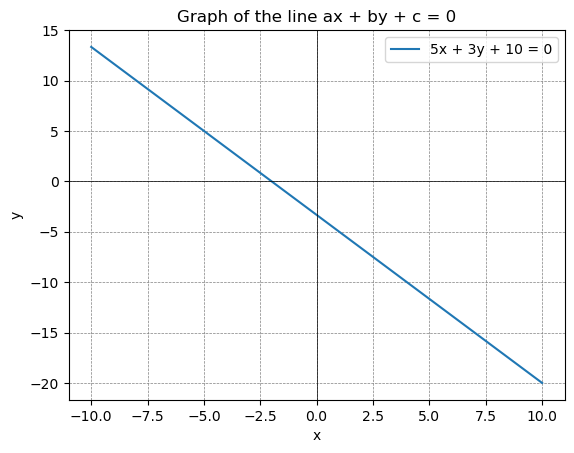

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the line ax + by + c = 0
a = 5
b = 3
c = 10

# Check if b is not 0 to avoid division by zero
if b == 0:
    print("b should not be zero for this representation.")
else:
    # Generate x values
    x = np.linspace(-10, 10, 100)

    # Compute y values based on the line equation
    y = (-a / b) * x - (c / b)

    # Plotting the line
    plt.figure()
    plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
    plt.title('Graph of the line ax + by + c = 0')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()


## Analytic Representation of a Circle

$x^2 + y^2 = r^2$ - Equation of a circle, with center at the origin $ (x=0,y=0) $ and radius $ r$.


$(x-a)^2 + (y-b)^2 = r^2$ - Equation of a circle, with center at - $(x=a,y=b)$ - and radius $r$.

$\frac{x^2}{a^2}+\frac{y^2}{b^2} = 1$ -  An ellipse

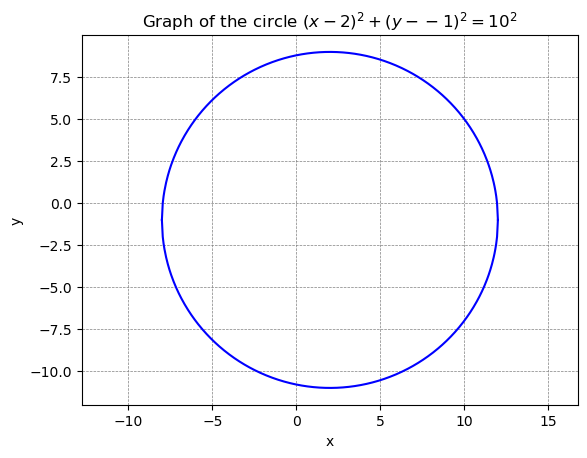

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Radius of the circle
r = 10

# Center of the circle (a, b)
a = 2
b = -1

# Generate x values from (a-r) to (a+r)
x = np.linspace(a - r, a + r, 400)

# Calculate the corresponding y values for the circle's upper and lower halves
y_upper = b + np.sqrt(r**2 - (x - a)**2)
y_lower = b - np.sqrt(r**2 - (x - a)**2)

# Plotting the circle
plt.figure()
plt.plot(x, y_upper, 'b')  # Upper half
plt.plot(x, y_lower, 'b')  # Lower half
plt.title(f'Graph of the circle $(x - {a})^2 + (y - {b})^2 = {r}^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')  # Ensures that x and y axes increments are equal
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()



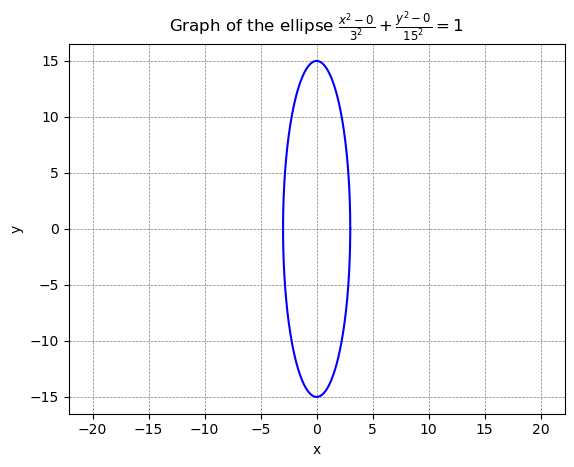

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Semi-major and semi-minor axes of the ellipse
a = 3  # Semi-major axis
b = 15  # Semi-minor axis

#Center of the ellipse (x_center, y_centre)
x_center = 0
y_center = 0

# Parameter t from 0 to 2pi
t = np.linspace(0, 2 * np.pi, 400)

# x and y coordinates for the ellipse
x = a * np.cos(t) + x_center
y = b * np.sin(t) + y_center

# Plotting the ellipse
plt.figure()
plt.plot(x, y, 'b')
plt.title(f'Graph of the ellipse $\\frac{{x^2-{x_center}}}{{{a}^2}} + \\frac{{y^2-{y_center}}}{{{b}^2}} = 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')  # Ensures that x and y axes increments are equal
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()


## Homogeneous Coordinates

We have mentioned these in a previous lecture and said we would come back to them. 
Homogeneous coordinates solve a number of problems.
Firstly they encode our new ideas (agreements) about incorporating ideal points (points at infinity). 

Secondly they can make an affine problem into a linear problem, which greatly eases our use of linear algebra.
This is how you saw them being used earlier.


2D Homogeneous are the easiest to intuitively understand but the 3D version is a direct extension. So if you can picture the 2D case you can accept the 3D case.

So take the points on a 2D (x,y) plane. 

Now add a third dimension z. But this does not act like the ordinary z-axis.
Move the entire x-y plane out to position 1 on the z-axis.

Now imagine that the origin (x=0,y=0,z=0) is the center of a projection. Turn every point in (x,y) into a line that passes through the origin and the point (x,y). 
Now imagine that you put another (x,y) plane at position 2 on the z-axis.
       


Question: If a line passes through the origin (x=0,y=0,z=0) and through a point (x,y,z=1) where will that line intersect the x-y plane at z=2.

Answer (2x,2y,2).

This is the case for any homogeneous coordinate, (kx,ky,k).

This is what we meant by the z-dimension not being independent of the others.
To get back to the standard coordinates you divide across by k.
       


Now what about points at infinity? 

In the standard x-y plane you would have to describe these as $(\infty, \infty)$ and there is no way to tell any ideal points apart. 

In homogeneous coordinates you do this as follows. You set the value of k to zero.
e.g. If the ideal point is given as (3,2,0), this tells us we have a point at infinity in the direction (3,2). What are it's standard coordinates? Divide across by k=0.\\ $(\frac{3}{0}, \frac{2}{0}) = (\infty, \infty)$ 

So in homogeneous coordinates we can treat them as ordinary points that have a z vaule of 0. But in standard coordinates we would have to deal with them as exceptional cases.


How do homogeneous coordinates make an affine problem linear? 
Well we turn every point in the affine space into a line that passes through the origin. 

Lines that pass through the origin are linear. 
       

In [93]:
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator

camera_coords = np.array(np.zeros([8,2,2]))
epipole_coords = np.array(np.zeros([2,2]))
lambda1 = 0
lambda2 = 0
x1 = 0
x2 = 0
num_points = 4



def update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line = True):
    
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    #axs = [fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)]
    axs = [fig.add_subplot(gs[0,3]),fig.add_subplot(gs[1,3])]
    # Clear existing plots
    axs[0].cla()
    axs[1].cla()
    
    # Update and configure the first plot (Camera 1 View)
    axs[0].set_title('Plane 1')
    axs[0].set_xlim(-1, 1)
    axs[0].set_ylim(-0.5, 0.5)
    rect1 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(0, 1, 1, 0.2))  # Cyan color
    axs[0].add_patch(rect1)
    axs[0].xaxis.set_major_locator(MultipleLocator(0.2))
    axs[0].set_aspect('equal')
    axs[0].grid(True)
    for i in range(0,num_points):
        axs[0].scatter(camera_coords[i][0][0], camera_coords[i][0][1], color='magenta')
        axs[0].text(camera_coords[i][0][0], camera_coords[i][0][1], f"x{i}", color='black')
        
    if vis_line:
        axs[0].plot([camera_coords[0][0][0], camera_coords[2][0][0]], [camera_coords[0][0][1], camera_coords[2][0][1]], color='magenta') #x0 to x2
        axs[0].plot([camera_coords[0][0][0], camera_coords[1][0][0]], [camera_coords[0][0][1], camera_coords[1][0][1]], color='magenta') #x0 to x1
        axs[0].plot([camera_coords[1][0][0], camera_coords[3][0][0]], [camera_coords[1][0][1], camera_coords[3][0][1]], color='magenta') #x1 to x3
        axs[0].plot([camera_coords[2][0][0], camera_coords[3][0][0]], [camera_coords[2][0][1], camera_coords[3][0][1]], color='magenta') #x2 to x3
        axs[0].plot([camera_coords[3][0][0], camera_coords[4][0][0]], [camera_coords[3][0][1], camera_coords[4][0][1]], color='magenta') #x3 to x4
        axs[0].plot([camera_coords[6][0][0], camera_coords[7][0][0]], [camera_coords[6][0][1], camera_coords[7][0][1]], color='magenta') #x6 to x7

        

        # Update and configure the second plot (Camera 2 View)
    axs[1].set_title('Plane 2')
    axs[1].set_xlim(-1, 1)
    axs[1].set_ylim(-0.5, 0.5)
    rect2 = patches.Rectangle((-0.6, -0.4), 1.2, 0.8, color=(1, 1, 0, 0.2))  # Yellow color
    axs[1].add_patch(rect2)
    axs[1].xaxis.set_major_locator(MultipleLocator(0.2))
    axs[1].set_aspect('equal')
    axs[1].grid(True)
    for i in range(0,num_points):
        axs[1].scatter(camera_coords[i][1][0], camera_coords[i][1][1], color='green')
        axs[1].text(camera_coords[i][1][0], camera_coords[i][1][1], f"x{i}\'", color='black')
    if vis_line:
        axs[1].plot([camera_coords[0][1][0], camera_coords[2][1][0]], [camera_coords[0][1][1], camera_coords[2][1][1]], color='green') #x0 to x2
        axs[1].plot([camera_coords[0][1][0], camera_coords[1][1][0]], [camera_coords[0][1][1], camera_coords[1][1][1]], color='green') #x0 to x1
        axs[1].plot([camera_coords[1][1][0], camera_coords[3][1][0]], [camera_coords[1][1][1], camera_coords[3][1][1]], color='green') #x1 to x3
        axs[1].plot([camera_coords[2][1][0], camera_coords[3][1][0]], [camera_coords[2][1][1], camera_coords[3][1][1]], color='green') #x2 to x3
        axs[1].plot([camera_coords[3][1][0], camera_coords[4][1][0]], [camera_coords[3][1][1], camera_coords[4][1][1]], color='green') #x3 to x4
        axs[1].plot([camera_coords[6][1][0], camera_coords[7][1][0]], [camera_coords[6][1][1], camera_coords[7][1][1]], color='green') #x3 to x4
        # Redraw the plots
    plt.draw()


# Define a function to update the plot with both elevation and azimuth angles
def update_plot(elev_angle, azim_angle, roll_angle, FL2, Alpha = 0, Beta = 0, Gamma = 0, tx=0, ty=0, tz=0, vis_line=True):
    # Create a new matplotlib figure and axis
    fig = plt.figure(figsize=(20, 6))
    gs = GridSpec(2, 4, figure=fig)
    #fig = plt.figure(figsize=(30, 10))
    #ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(gs[0:4,:], projection='3d')
    # Set axes labels and limits
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 4])
    global E_mat
    global rot


    # Second camera array
    K=np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
    
    T = np.array([[1,0,0,tx],
                   [0,1,0,ty],
                   [0,0,1,tz],
                   [0,0,0,1]])
    
    # Individual Euler angle matrices
    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot = alphaRot @ betaRot @ gammaRot
    
    # Camera two focal length only.
    K_FL = ([[FL2,0,0,0],
       [0,FL2,0,0],
       [0,0,FL2,0],
       [0,0,0,1]])
    
    '''Special matrix for the applying the focal length to the z-axis only 
    This is used to move the image sensor with the focal length but not resize the sensor
    '''
    K_plane = ([[1,0,0,0],
               [0,1,0,0],
               [0,0 ,FL2,0],
               [0,0 ,0,1]])
    
    '''K_NF is the camera two matrix but without the focal length
    This is to all the red, green and blue axes for camera two 
    to be the same size as for camera one. So this matrix is to help 
    with the visualisation only'''
    K_NF = K @ T @ rot 
    
    '''K_z is for the visualisation only. It allows the camera two frame to be shown in the correct
    position without re-sizing the frame. Note, as we are only affecting the z-axis, ordering matters here.
    You must do the rotation and translation first and only then extend the z-axis or otherwise you will rotate
    and translate what you did to the z-axis and point it in another direction'''
   
    K_z = K @ T  @ rot @ K_plane 
   
    '''This is the full camera two matrix (relative to camera one). The focal length is in multiples 
    of the first camera focal length. Hence the first camera focal lenght is fixed at 1 and therefore all 
    coordinates are in units of the focal length of camera one'''
    
    K = K  @ T  @  rot @  K_FL  
    
       
    # Plotting the axes for the two cameras
    axes = np.array([[[-.1, 0, 0],[.1, 0, 0]],
            [[0, -.1, 0], [0, .1, 0]],
            [[0, 0, 0], [0, 0, 0.5]]])
               
       
    axes_cam_2 = axes.reshape(6,3)
    axes_cam_2 = np.hstack([axes_cam_2, np.ones((6, 1))])
    axes_cam_2 = K_NF @ axes_cam_2.transpose()
    axes_cam_2 = axes_cam_2.transpose() 
    # Remove the last column
    axes_cam_2 = axes_cam_2[:, :-1]
    axes_cam_2 = axes_cam_2.reshape(3,2,3)
    colors = ['r', 'g', 'b']  # Colors for each axis
    for i in range(0, 3):
        ax.plot([axes_cam_2[i][0][0], axes_cam_2[i][1][0]],  # X coordinates
            [axes_cam_2[i][0][1], axes_cam_2[i][1][1]],  # Y coordinates
            [axes_cam_2[i][0][2], axes_cam_2[i][1][2]],  # Z coordinates
            color=colors[i]) 
        
        ax.plot([axes[i][0][0], axes[i][1][0]],  # X coordinates
            [axes[i][0][1], axes[i][1][1]],  # Y coordinates
            [axes[i][0][2], axes[i][1][2]],  # Z coordinates
            color=colors[i])   
    
    intersection_point = np.zeros([8,3])
    cam_1_coord = np.zeros([8,2])
    cam_2_coord = np.zeros([8,2])
    intersection_point_imageP2 = np.zeros([8,4])
    points = np.zeros([8,3,3])
    world_coord = np.array( [[0, 0, 5],
                            [0.5, 0.5, 5],
                            [-0.5, -0.5, 5],
                            [0.5,0,0],
                             [-0.4,0,2.5],
                             [-0.6,0.3,3],
                             [-0.3,0.7,2.7],
                             [-0.3,0,2.42]],)
    for i in range(0,num_points):
        # adding the world coordinate point
        
        ax.scatter(*world_coord[i], color='black')
        ax.text(world_coord[i][0], world_coord[i][1], world_coord[i][2], f"X{i}", color='black')

        # Drawing a line from the origin to the  World coordinate point
        ax.plot([0, world_coord[i][0]], [0, world_coord[i][1]], [0, world_coord[i][2]], color='magenta')

        # Creating a plane normal to the y-axis centered at (0, 1, 0)
        x = np.linspace(-.6, .6, 10)
        y = np.linspace(-.4, .4, 10)
        X, Y = np.meshgrid(x, y)
        Z = np.ones_like(X)  # Plane centered at Z=focal length
        image_plane1 = np.array([X,Y,Z, np.ones_like(X)])



        camera_2_center = K_NF @ np.array([0,0,0,1])
        # Drawing a line from the camera 2 center to the point
        ax.plot([camera_2_center[0], world_coord[i][0]], [camera_2_center[1], world_coord[i][1]], [camera_2_center[2], world_coord[i][2]], color='green')

        # Adding the plane with transparency
        if i == 0:
            ax.plot_surface(image_plane1[0], image_plane1[1], image_plane1[2], color='cyan', alpha=0.2)

            # This reshapes image_plane1 for matrix multiplication by our camera 2 matrix
            image_plane2 = K_z @ image_plane1.reshape(4,-1) 

            # Reshaping back to original shape
            image_plane2 = image_plane2.reshape(image_plane1.shape) 
            ax.plot_surface(image_plane2[0], image_plane2[1], image_plane2[2], color='yellow', alpha=0.2)

        # The intersection point where the magenta line intersects the image_plane1 Z = 1
        intersection_point[i] = (world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2], world_coord[i][2]/world_coord[i][2])
        cam_1_coord[i] = np.array(intersection_point[i][:2])


        
        ax.scatter(*intersection_point[i], color='magenta')
        
        world_hom = np.array([world_coord[i][0],world_coord[i][1],world_coord[i][2],1])
        try:
            K_inv = np.linalg.inv(K)
        except np.linalg.LinAlgError:
            print("The matrix is not invertible.")

        temp_world = K_inv @ world_hom
        if i == 0:
            temp_world0=temp_world
        intersection_point_imageP2[i] = np.array([FL2*temp_world[0]/temp_world[2], 
                                      FL2*temp_world[1]/temp_world[2], 
                                      FL2*temp_world[2]/temp_world[2],1])

        x2 = intersection_point_imageP2[i][:3]
        cam_2_coord[i] = intersection_point_imageP2[i][:2]

        intersection_point_imageP2[i] = K_NF @ intersection_point_imageP2[i]
        pt = (intersection_point_imageP2[i][0],intersection_point_imageP2[i][1],intersection_point_imageP2[i][2])
        ax.scatter(*pt, color='green')

        # draw line between camera centers
        ax.plot([0, camera_2_center[0]], [0, camera_2_center[1]], [0, camera_2_center[2]], color='cyan')

        points[i] = np.array([[0, 0, 0],  # Origin - camera 1 center
                           [world_coord[i][0], world_coord[i][1], world_coord[i][2]],  # World coordinate
                           [camera_2_center[0], camera_2_center[1], camera_2_center[2]]])  # Camera 2 center

        # Shade in the Epipolar plane
        epipoloar_plane = Poly3DCollection([points[i]])
        epipoloar_plane.set_color('grey')
        epipoloar_plane.set_alpha(0.2)  # Adjust transparency here
        ax.add_collection3d(epipoloar_plane)
        
        if i == 0:
            
            # Adjust view
            ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

        #show view in camera 1    
        cam_1_coord[i] = np.array([world_coord[i][0]/world_coord[i][2], world_coord[i][1]/world_coord[i][2]])


        camera_coords[i][0] = cam_1_coord[i]
        camera_coords[i][1] = cam_2_coord[i]

    
    
    update_2d_plots(fig,gs, camera_coords, epipole_coords, vis_line)
    
    lambda1 = world_coord[0][2]#math.sqrt((world_coord[0]**2)+(world_coord[1]**2)+(world_coord[2]**2))
    lambda2 = FL2*temp_world0[2]# math.sqrt((world_coord[0]-camera_2_center[0])**2+(world_coord[1]-camera_2_center[1])**2+(world_coord[2]-camera_2_center[2])**2)
    
    
    plt.show()
    



elev_slider = widgets.IntSlider(min=-180, max=180, step=1, value=140, description='Elevation')
azim_slider = widgets.IntSlider(min=-180, max=180, step=1, value=90, description='Azimuth')
roll_slider = widgets.IntSlider(min=-180, max=180, step=1, value=-90, description='Roll')



FL_slider2 = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=2, description='Plane 2 Distance')



# Group sliders into two columns
left_box = widgets.VBox([elev_slider, azim_slider, roll_slider])
right_box = widgets.VBox([ FL_slider2])

vis_line_checkbox = widgets.Checkbox(value=False, description='Make lines Visible',disabled=False)

# Combine the two columns into a single horizontal layout
ui = widgets.HBox([left_box,  right_box])


# Interactive widget
out = widgets.interactive_output(update_plot, {'elev_angle': elev_slider, 'azim_angle': azim_slider, 
                                               'roll_angle': roll_slider, 
                                                'FL2': FL_slider2, 
                                               'vis_line': vis_line_checkbox})

sliders_box = widgets.VBox([elev_slider, azim_slider, roll_slider, 
                            FL_slider2,vis_line_checkbox])
ui = widgets.HBox([sliders_box, out])


# Display the UI and the output widget
display(ui)

## Extension to 3D

3D is not as easy to visualise as you have to create a $4^{th}$ dimension to project from but the analytical process is the exact same.

A point in (x,y,z) becomes (kx,ky,kz,k) and the easiest thing for us to do is to choose k=1 so we get (x,y,z,1).
If the point is an ideal point, k is set to 0.

Working back the way you just divide across by the $4^{th}$ dimension.

## Do we lose all the preservations?

So you may remember that rigid body transformations preserved angles and magnitudes but projective did not. 

Does this mean that moving to homogeneous coordinates loses us those rigid body preservations? 

The answer is no. 

We get away with it because while the homogeneous coordinates are a projection, they are a projection from a higher dimension.

Projective preserves straight lines. 

The straight lines are all we require to get back to the lower dimensions. 

## What is the link between homogeneous coordinates and a camera projection?

Well they are both projections but that's where it ends. Homogeneous coordinates unify ideal points and ordinary points and can make an affine transformation linear. 

A camera projection is not solving any such problem. If anything, it _is_ a problem. We would like to capture the 3D world but the camera can only capture 2D and that 2D plane that is captured is a projection.

So a camera loses us one of our three dimensions and loses us the preservations of angles and magnitudes etc.

Homogeneous coordinates don't lose anything.

       

!["HigherEd 4.0 is funded by the Human Capital Initiative Pillar 3. HCI Pillar 3 supports projects to enhance the innovation and agility in response to future skills needs"](images/HCIFunding.png)